In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-1, 1],
    c1 = [0.1, 2.0],
    c2 = [0.5, 2.0],
    w = 1.2,
    w_decay = 0.95))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

	0.6584071934780228
update global 0.6584071934780228
update local, 0.6814439720082506
Iteration 138/300: 	0.6584071934780228
update local, 0.6775453514027818
update global 0.6584071934780228
update local, 0.6783872230030666
update local, 0.6919987758743429
Iteration 139/300: 	0.6584071934780228
update global 0.6584071934780228
update local, 0.6568555742780738
update global 0.6568555742780738
Iteration 140/300: 	0.6568555742780738
update global 0.6568555742780738
Iteration 141/300: 	0.6568555742780738
update local, 0.6752228781441661
update global 0.6568555742780738
Iteration 142/300: 	0.6568555742780738
update local, 0.6720552533586449
update global 0.6568555742780738
Iteration 143/300: 	0.6568555742780738
update local, 0.7373673626195605
update global 0.6568555742780738
Iteration 144/300: 	0.6568555742780738
update global 0.6568555742780738
Iteration 145/300: 	0.6568555742780738
update local, 0.7033508158175745
update global 0.6568555742780738
Iteration 146/300: 	0.6568555742780738
up

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.8014786622234594, 0.7961845041435456, 0.7754129427615727, 0.7754129427615727, 0.7754129427615727, 0.7754129427615727, 0.7754129427615727, 0.7754129427615727, 0.7465573604975906, 0.7238737445011317, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6849016563914646, 0.6731200173636464, 0.6731200173636464, 0.6731200173636464, 0.6731200173636464, 0.6731200173636464, 0.6731200173636464,

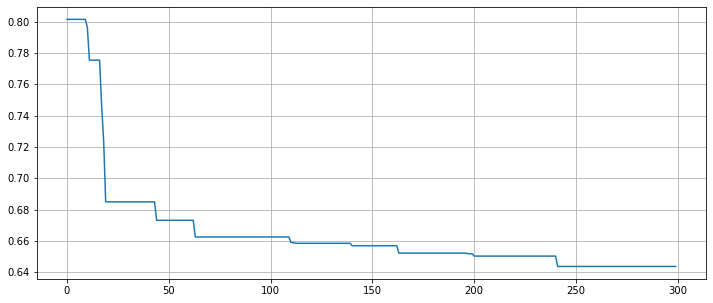

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.91705465]
 [0.05452877]
 [0.02841653]]
[0. 0. 1.] <-> [[0.9383597 ]
 [0.0416404 ]
 [0.01999992]]
[1. 0. 0.] <-> [[0.9317785 ]
 [0.04591724]
 [0.02230427]]
[1. 0. 0.] <-> [[0.93683636]
 [0.0427201 ]
 [0.02044347]]
[1. 0. 0.] <-> [[0.52250236]
 [0.2607177 ]
 [0.21677992]]
[1. 0. 0.] <-> [[0.8986779 ]
 [0.06074238]
 [0.04057975]]
[1. 0. 0.] <-> [[0.9061773 ]
 [0.05472847]
 [0.03909421]]
[1. 0. 0.] <-> [[0.4597599 ]
 [0.27551243]
 [0.26472765]]
[1. 0. 0.] <-> [[0.90908825]
 [0.05880653]
 [0.03210523]]
[1. 0. 0.] <-> [[0.904618  ]
 [0.0559085 ]
 [0.03947341]]
[1. 0. 0.] <-> [[0.8980266 ]
 [0.06371476]
 [0.0382586 ]]
[1. 0. 0.] <-> [[0.9158333 ]
 [0.05520508]
 [0.02896164]]
[1. 0. 0.] <-> [[0.9109792 ]
 [0.05782249]
 [0.03119838]]
[0. 0. 1.] <-> [[0.04250108]
 [0.41366917]
 [0.5438297 ]]
[1. 0. 0.] <-> [[0.5113271 ]
 [0.25590235]
 [0.23277058]]
[1. 0. 0.] <-> [[0.89819163]
 [0.06366921]
 [0.03813911]]
[1. 0. 0.] <-> [[0.89981365]
 [0.05974655]
 [0.0404398 ]]
[1. 0. 0.] <->